In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
pth='alpha2/'
#pth='../sklearn/data/alpha2/'

mf15 = np.load(pth + 'mfields_R15e3.npz')
mf9  = np.load(pth + 'mfields_R9e3.npz') 
mf5  = np.load(pth + 'mfields_R5e3.npz')
mf1  = np.load(pth + 'mfields_R1e3.npz') 
mf05 = np.load(pth + 'mfields_R5e2.npz')

## Plot $B^2$ vs time

Text(0.5, 0, 'Time (resistive)')

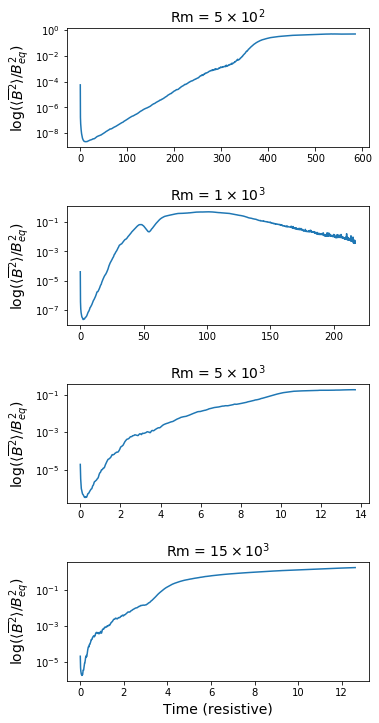

In [3]:
ylab = r'$\log(\langle \overline{B}^2 \rangle /B_{eq}^2)$'

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(6,12))
plt.subplots_adjust(left=0.2, hspace=0.5)

ax1.plot(mf05['tt']/mf05['tres'], (np.mean(np.array(mf05['bxm'])**2, axis=1) + np.mean(np.array(mf05['bym'])**2, axis=1))/mf05['uave']**2 )     
ax1.set_yscale('log')
ax1.set_ylabel(ylab, fontsize=14)
ax1.set_title(r'Rm = $5\times10^2$', fontsize=14)

ax2.plot(mf1['tt']/mf1['tres'], (np.mean(np.array(mf1['bxm'])**2, axis=1) + np.mean(np.array(mf1['bym'])**2, axis=1))/mf1['uave']**2)  
ax2.set_yscale('log')
ax2.set_ylabel(ylab, fontsize=14)
ax2.set_title(r'Rm = $1\times10^3$', fontsize=14)

ax3.plot(mf5['tt']/mf5['tres'], (np.mean(np.array(mf5['bxm'])**2, axis=1) + np.mean(np.array(mf5['bym'])**2, axis=1))/mf5['uave']**2 )   
ax3.set_yscale('log')
ax3.set_ylabel(ylab, fontsize=14)
ax3.set_title(r'Rm = $5\times10^3$',fontsize=14)

ax4.plot(mf15['tt']/mf15['tres'], (np.mean(np.array(mf15['bxm'])**2, axis=1) + np.mean(np.array(mf15['bym'])**2, axis=1))/mf15['uave']**2 ) 
ax4.set_yscale('log')
ax4.set_ylabel(ylab, fontsize=14)
ax4.set_title(r'Rm = $15\times10^3$', fontsize=14)
ax4.set_xlabel('Time (resistive)', fontsize=14)

## Plot $\mathcal{E}^2$ vs time

Text(0.5, 0, 'Time (resistive)')

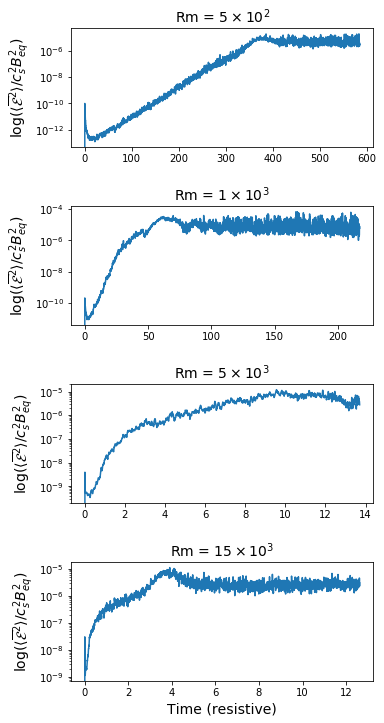

In [4]:
ylab = r'$\log(\langle \overline{\mathcal{E}}^2 \rangle /c_s^2 B_{eq}^2)$'

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(6,12))
plt.subplots_adjust(left=0.2, hspace=0.5)

ax1.plot(mf05['tt']/mf05['tres'], (np.mean(np.array(mf05['emfx'])**2, axis=1) + np.mean(np.array(mf05['emfy'])**2, axis=1))/mf05['uave']**2 )     
ax1.set_yscale('log')
ax1.set_ylabel(ylab, fontsize=14)
ax1.set_title(r'Rm = $5\times10^2$', fontsize=14)

ax2.plot(mf1['tt']/mf1['tres'], (np.mean(np.array(mf1['emfx'])**2, axis=1) + np.mean(np.array(mf1['emfy'])**2, axis=1))/mf1['uave']**2)  
ax2.set_yscale('log')
ax2.set_ylabel(ylab, fontsize=14)
ax2.set_title(r'Rm = $1\times10^3$', fontsize=14)

ax3.plot(mf5['tt']/mf5['tres'], (np.mean(np.array(mf5['emfx'])**2, axis=1) + np.mean(np.array(mf5['emfy'])**2, axis=1))/mf5['uave']**2 )   
ax3.set_yscale('log')
ax3.set_ylabel(ylab, fontsize=14)
ax3.set_title(r'Rm = $5\times10^3$', fontsize=14)

ax4.plot(mf15['tt']/mf15['tres'], (np.mean(np.array(mf15['emfx'])**2, axis=1) + np.mean(np.array(mf15['emfy'])**2, axis=1))/mf15['uave']**2 ) 
ax4.set_yscale('log')
ax4.set_ylabel(ylab, fontsize=14)
ax4.set_title(r'Rm = $15\times10^3$', fontsize=14)
ax4.set_xlabel('Time (resistive)', fontsize=14)

## Make pandas dataframe to do analysis

In [5]:
def ave_z(arr,zone=128,ztwo=-1,verbose=None):
    if verbose:
        print(f'z1: {zone}, z2: {ztwo}')
    return np.mean(arr[:,zone:ztwo],axis=1)

def read_mf(fname='mfields.npz'):
    mf = np.load(fname)
    return mf['bxm'], mf['bym'], mf['jxm'], mf['jym'], mf['emfx'], mf['emfy']

def gen_df_zave_log(fname='mfields.npz',z1=0,z2=-1,verbose=True):
    '''
    Generate a dataframe by averaging squared fields over z from z1 to z2
    '''

    if verbose:
        print(f"Generating z averaged dataframe with z1: {z1} and z2: {z2}") 
    bxm,bym,jxm,jym,Exm,Eym = read_mf(fname=fname)
  
    return pd.DataFrame.from_dict({
        'Bx2l': np.log10(ave_z(bxm**2,zone=z1,ztwo=z2)),
        'By2l': np.log10(ave_z(bym**2,zone=z1,ztwo=z2)),
        'Jx2l': np.log10(ave_z(jxm**2,zone=z1,ztwo=z2)),
        'Jy2l': np.log10(ave_z(jym**2,zone=z1,ztwo=z2)),
        'Ex2l': np.log10(ave_z(Exm**2,zone=z1,ztwo=z2)),
        'Ey2l': np.log10(ave_z(Eym**2,zone=z1,ztwo=z2))        
        })

## Focus on just one data set: Rm = 15e3

In [6]:
df15 = gen_df_zave_log(fname=pth + 'mfields_R15e3.npz',z1=0)
df15.head()

Generating z averaged dataframe with z1: 0 and z2: -1


/home/fnauman/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/fnauman/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


,Bx2l,By2l,Jx2l,Jy2l,Ex2l,Ey2l
0,-7.450251,-7.558140,-3.250390,-3.279779,-inf,-inf
1,-7.700896,-7.700259,-3.639315,-3.732886,-10.352357,-10.321101
2,-7.871157,-7.855702,-3.938279,-4.054107,-10.901457,-10.959168
3,-8.031341,-7.969128,-4.246167,-4.302913,-11.458230,-11.383981
4,-8.125233,-8.128124,-4.575891,-4.508705,-11.645343,-11.658559


### Rolling mean for the EMF

In [7]:
t1 = 0
t2 = -1
n_win = 20
Ex2l_rolmean = df15['Ex2l'].iloc[t1:t2].rolling(window=n_win).mean()
#print(Ex2l_rolmean.shape,Ex2l_rolmean.head(n_win))

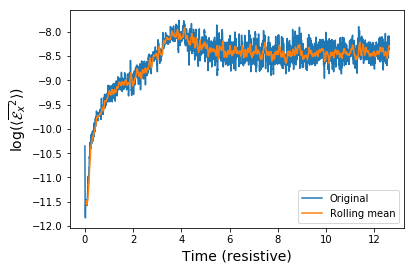

In [8]:
tres_R15e4 = mf15['tt']/mf15['tres']

plt.plot(tres_R15e4, df15['Ex2l'], label='Original')
plt.plot(tres_R15e4[n_win:-2],Ex2l_rolmean[n_win:-1], label='Rolling mean')
plt.xlabel('Time (resistive)', fontsize=14)
plt.ylabel(r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$', fontsize=14)
plt.legend()
#plt.savefig('emfx2.pdf', bbox_inches='tight')

In [9]:
list(mf05)

['tres',
 'Rm',
 'uave',
 'kf',
 'tt',
 'bxm',
 'bym',
 'b2tot',
 'u2tot',
 'emfx',
 'emfy',
 'jxm',
 'jym']